In [1]:
from nilearn import plotting
import os
import matplotlib.pyplot as plt
import nibabel as nib
import seaborn as sns

%matplotlib inline

/home/jdurnez/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
sns.set_style("whitegrid")

In [3]:
basedir = '/oak/stanford/groups/russpold/data/ds000030/1.0.3/derivatives/'
preprocessing = ['fslfeat_5.0.9','fmriprep-1.0.3']
images = []
for pre in preprocessing:
    z11 = os.path.join(basedir,'fmriprep_vs_feat/%s/task/sub-50076/stopsignal.feat/stats/zstat11.nii.gz'%pre)
    images.append(z11)

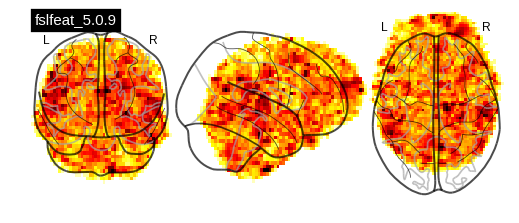

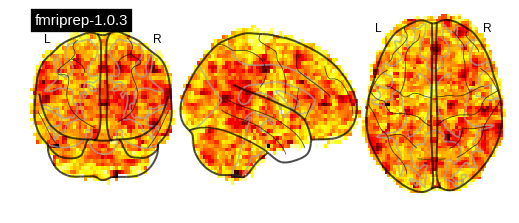

In [4]:
cut_coords = [-15, -8, 6, 30, 46, 62]
for idx,image in enumerate(images):
    plotting.plot_glass_brain(image,title=preprocessing[idx])
plotting.show()

In [5]:
# This cell compares statistical results, but due to the weird affine stuff, it's just clutter
#cut_coords = [-15, -8, 6, 30, 46, 62]
#for idx,image in enumerate(images):
#    plotting.plot_stat_map(image,title=preprocessing[idx],vmax=6,display_mode='z',threshold=1,cut_coords=cut_coords)
#plotting.show()

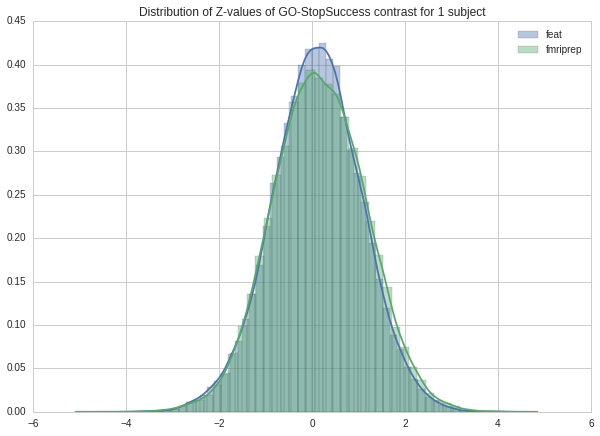

In [6]:
zfeat = nib.load(images[0]).get_data()
zfmriprep = nib.load(images[1]).get_data()

zfeatflat = zfeat[zfeat != 0]
zfmriprepflat = zfmriprep[zfmriprep != 0]

plt.figure(figsize=(10,7))
sns.distplot(zfeatflat,label='feat')
sns.distplot(zfmriprepflat,label='fmriprep')
plt.title("Distribution of Z-values of GO-StopSuccess contrast for 1 subject")
plt.legend()